# LSTM Implementation

Step-by-step LSTM implementation using the processes described in [Understanding LSTM Networks](https://colah.github.io/posts/2015-08-Understanding-LSTMs/). Note that the diagrams in this notebook are inspired from the images in [Christopher Olah](https://colah.github.io/about.html)'s blog.

In [1]:
import numpy as np
import math

### LSTM Overview

![Research Diagrams - Legend.jpg](<attachment:Research Diagrams - Legend.jpg>)
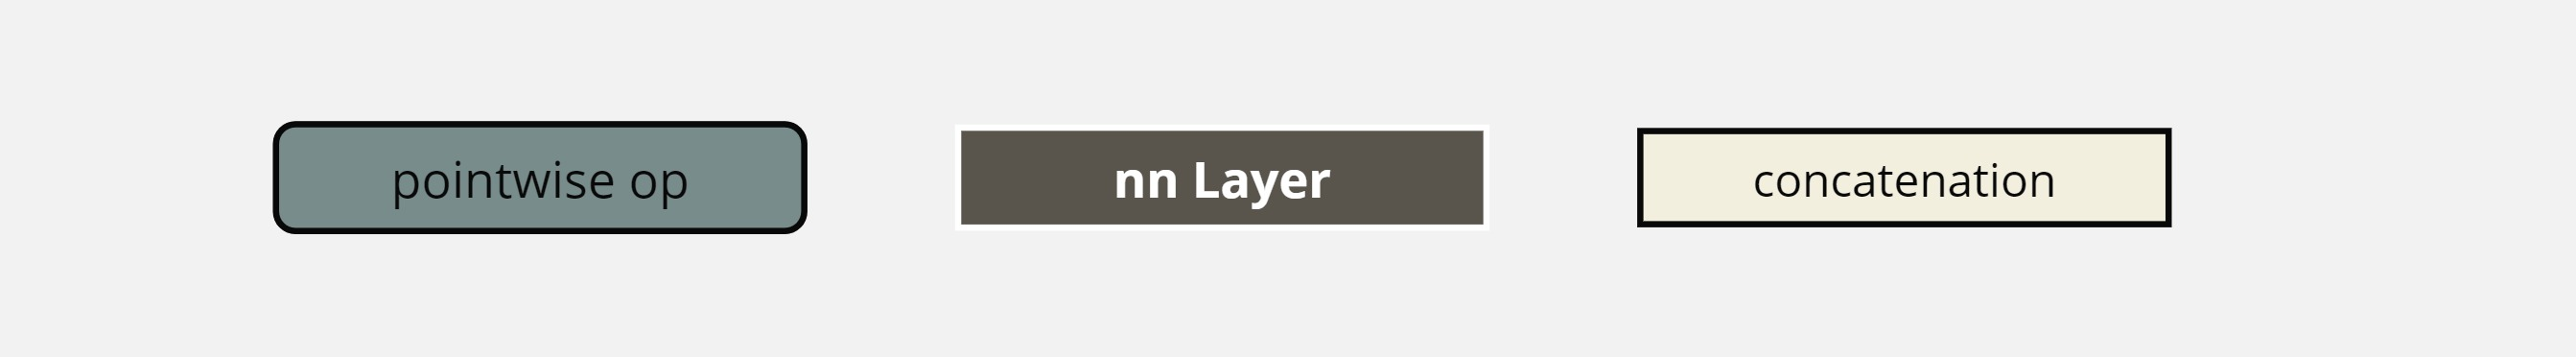

![Research Diagrams - LSTM Overview.jpg](<attachment:Research Diagrams - LSTM Overview.jpg>)
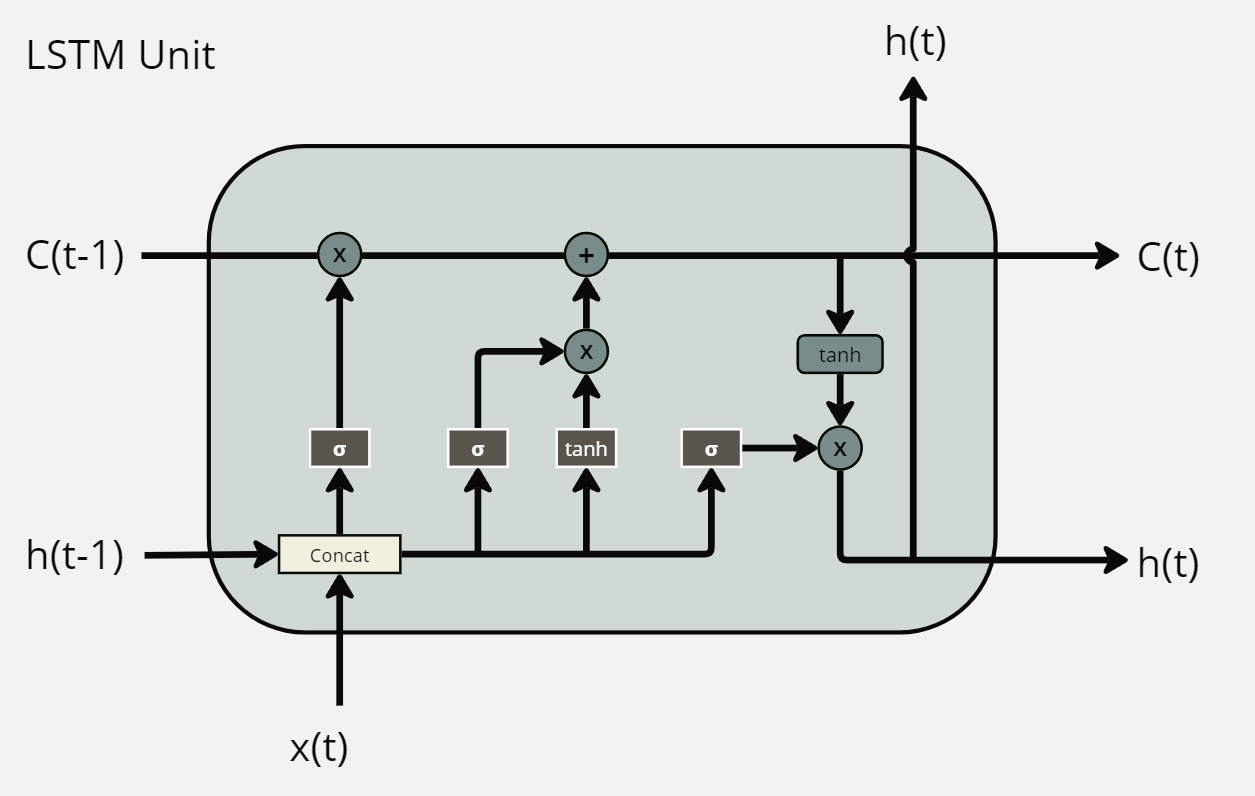

In [3]:
# Define the activation functions used in the unit

def sigmoid(x: np.ndarray) -> np.ndarray:
    return 1 / (1 + np.exp(-x))

def tanh(x: np.ndarray) -> np.ndarray:
    return (np.exp(x) - np.exp(-x)) / (np.exp(x) + np.exp(-x))

### The Forget Gate

![Research Diagrams - Forget Gate.jpg](<attachment:Research Diagrams - Forget Gate.jpg>)
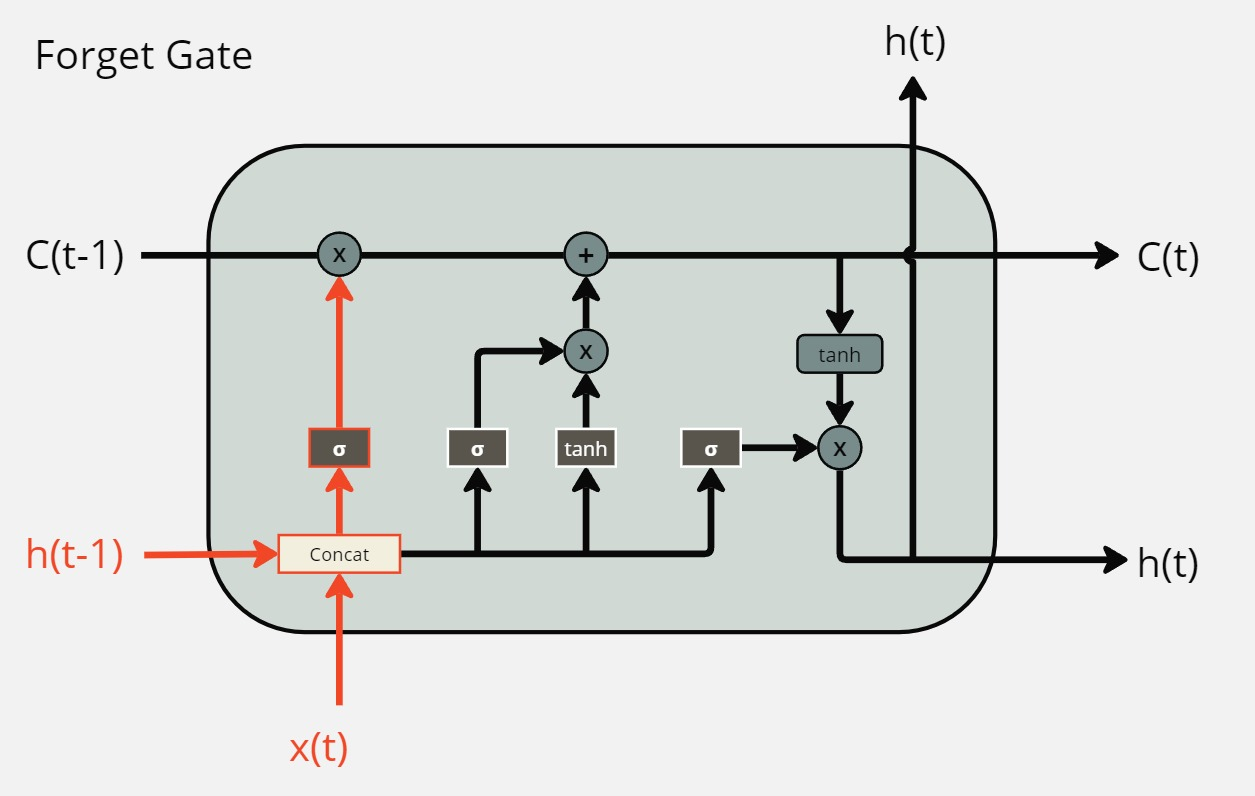

In [4]:
input_size = 32

# Input to unit
x = np.random.normal(loc=0, scale=1, size=input_size)
x

array([-0.13803426, -1.93312646,  0.12416734, -2.44108129,  0.52594301,
        0.97341724, -0.68083653,  1.12971513,  0.27286152, -1.18094133,
        1.15826649,  0.21414934,  0.9412887 ,  0.73235329,  1.03968119,
        0.97071932, -0.3471485 ,  1.72729094,  0.37225874, -0.21539921,
        0.16484434, -0.93286577,  0.32170747, -0.69557243, -1.23316597,
       -0.39036439, -2.11648016,  1.17079354,  1.16807481,  1.81068018,
        0.95454614,  0.63671112])

In [5]:
state_size = 64

# Hidden state initialization
h = np.zeros(shape=state_size)
h

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [6]:
# Cell state initialisation
c = np.zeros(shape=state_size)
c

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [7]:
# Concatenate the hidden state and the input
xh = np.concatenate([h, x], axis=0)
xh

array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        , -0.13803426,
       -1.93312646,  0.12416734, -2.44108129,  0.52594301,  0.97

In [8]:
xh.shape

(96,)

In [9]:
# Create a weight matrix for the forget gate 
wf = np.random.normal(loc=0, scale=1, size=(state_size, input_size + state_size))
wf.shape

(64, 96)

In [10]:
# Create a bias vector for the forget gate
bf = np.random.normal(loc=0, scale=1, size=state_size)
bf.shape

(64,)

In [11]:
# Create the output of the forget gate (this will be used to determine how much of the cell state will be remembered)
# Note, np.matmul performs a matrix multiplication - not element-wise. This brings ft to the same size as the hidden state
ft = sigmoid(np.matmul(wf, xh) + bf)
ft.shape

(64,)

### Input Gate

![Research Diagrams - Input Gate and Candidate Memory.jpg](<attachment:Research Diagrams - Input Gate and Candidate Memory.jpg>)
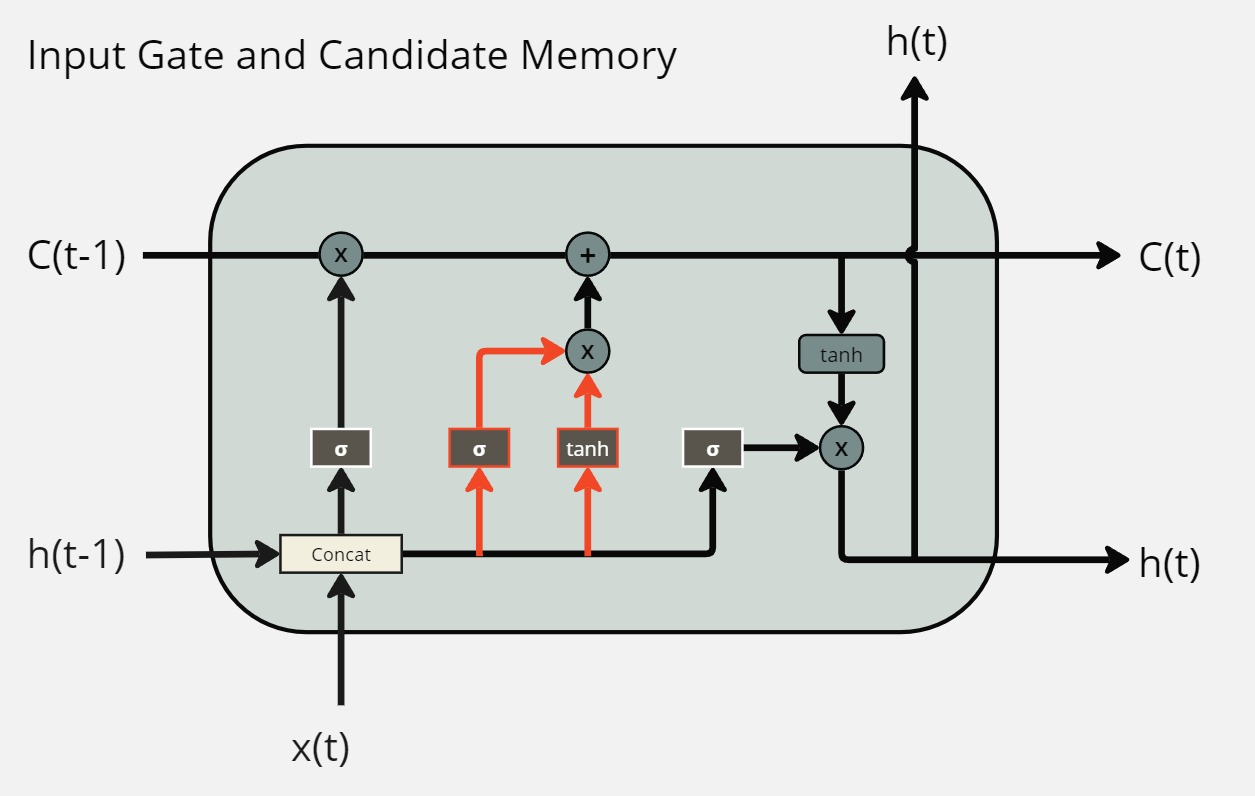

In [12]:
# Create a weight matrix for the input gate 
wi = np.random.normal(loc=0, scale=1, size=(state_size, input_size + state_size))
wi.shape

(64, 96)

In [16]:
# Create a bias vector for the input gate
bi = np.random.normal(loc=0, scale=1, size=state_size)
bi.shape

(64,)

In [17]:
# Determine how much of the candidate memory will be added to the cell state
it = sigmoid(np.matmul(wi, xh) + bi)
it.shape

(64,)

### Candidate Memory

In [18]:
# Create a weight matrix for the candidate memory
wc = np.random.normal(loc=0, scale=1, size=(state_size, input_size + state_size))
wc.shape

(64, 96)

In [19]:
# Create a bias vector for the candidate memory
bc = np.random.normal(loc=0, scale=1, size=state_size)
bc.shape

(64,)

In [20]:
# Create a candidate memory - that together with the input gate will determine how much of the new memory will be added to the cell state
ct = tanh(np.matmul(wc, xh) + bc)
ct.shape

(64,)

### Updating the cell state

![Research Diagrams - Cell State.jpg](<attachment:Research Diagrams - Cell State.jpg>)
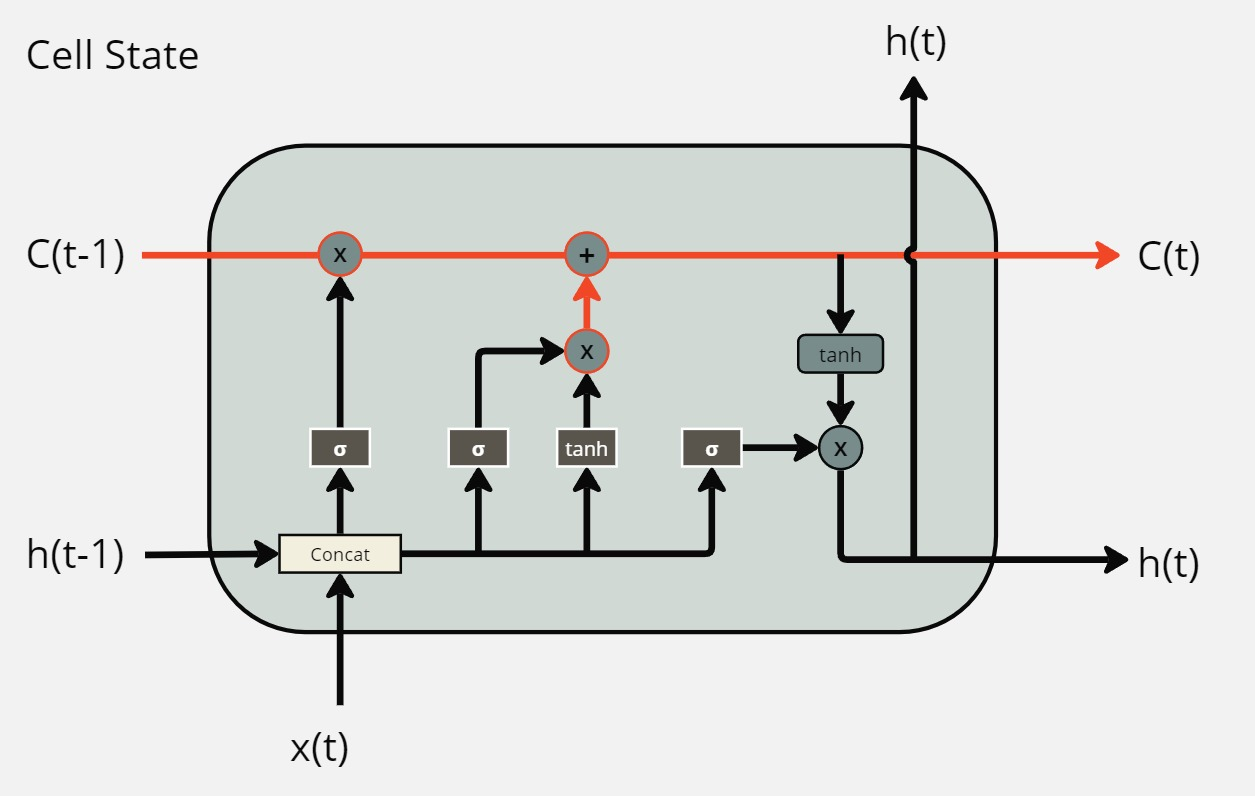

In [14]:
# Apply the forget date: this determines how much information from c to be retained. At t=0, c is already 0, so it stays 0
# Note, np.multiply performs a Hadamard product - elementwise multiplication
c = np.multiply(c, ft)
c

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [21]:
# Apply the candidate memory and input date - how much of a new memory is added to the cell state
c = c + np.multiply(it, ct)
c

array([ 6.38800982e-01, -7.53439349e-04,  3.58659969e-01,  9.99235875e-01,
        9.99999265e-01, -7.61019182e-01,  3.01116537e-01, -5.49924149e-07,
       -3.16378501e-01,  2.83966638e-02,  9.53157079e-01, -8.93158357e-01,
       -7.92177449e-01, -8.04863664e-01,  9.98107341e-01, -2.42649259e-05,
       -1.35533654e-02,  3.09467352e-02,  1.94439177e-06,  9.20814307e-01,
       -1.47979049e-02, -1.84869987e-03, -2.00609528e-01, -7.85074701e-01,
       -1.32092107e-04, -9.80962061e-01,  7.98297118e-01,  9.15804030e-01,
       -3.31050278e-04, -9.36913004e-01,  9.93993163e-01, -8.59933977e-01,
        6.56381509e-02, -3.89763543e-01, -2.76786670e-04,  9.43913444e-01,
       -1.80635729e-03, -9.71571248e-01, -9.10251911e-01, -2.45127430e-05,
        7.32519813e-03,  9.73431090e-01, -5.83415417e-01,  1.88446187e-02,
       -8.97685792e-02, -7.37082690e-01,  9.94785868e-01, -9.52868540e-01,
        2.93860591e-04, -1.46519553e-07,  9.71011989e-01, -9.37907115e-01,
       -8.76424878e-01,  

### Output Gate

![Research Diagrams - Output Gate.jpg](<attachment:Research Diagrams - Output Gate.jpg>)
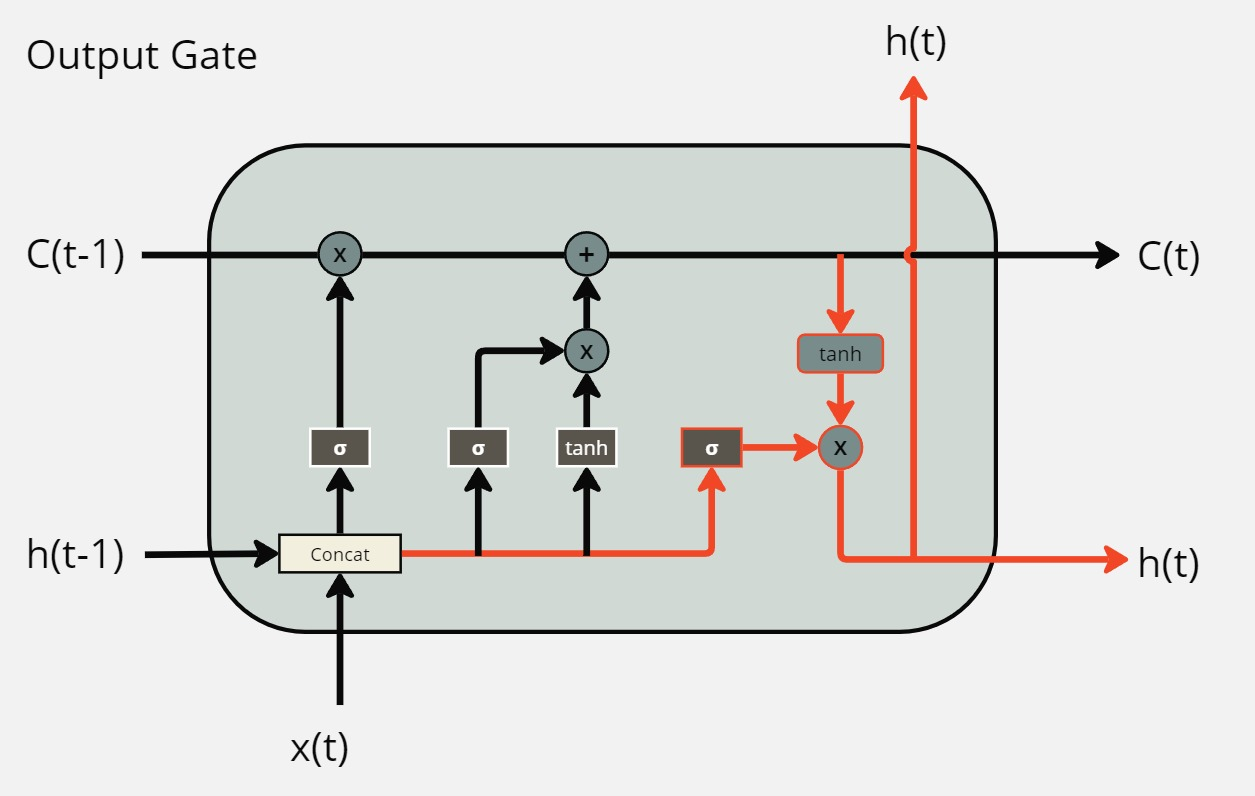

In [22]:
# Create a weight matrix for the output gate 
wo = np.random.normal(loc=0, scale=1, size=(state_size, input_size + state_size))
wo.shape

(64, 96)

In [23]:
# Create a bias vector for the output gate
bo = np.random.normal(loc=0, scale=1, size=state_size)
bo.shape

(64,)

In [24]:
# Create the output of the output gate (this will be used to determine how much of the candidate hidden state will be remembered)
ot = sigmoid(np.matmul(wo, xh) + bo)
ot.shape

(64,)

In [25]:
# Determine how much of the candidate hidden state is remembered and will be output
ht = np.multiply(ot, tanh(c))
ht.shape

(64,)

In [26]:
ht

array([ 3.79681526e-01, -1.54263601e-09,  3.43982834e-01,  1.46485487e-02,
        7.59776185e-01, -1.34679082e-02,  2.71141059e-01, -1.77521974e-10,
       -7.24204706e-05,  2.24342093e-04,  7.28472162e-01, -4.72137811e-01,
       -6.24029027e-01, -6.47689143e-01,  4.20244364e-05, -2.41515575e-05,
       -4.98548390e-04,  3.08196778e-02,  1.79760902e-06,  9.52174501e-02,
       -9.62503962e-03, -2.13938142e-07, -6.34236340e-02, -6.55596083e-01,
       -1.29694798e-04, -2.97955357e-03,  4.64368611e-05,  4.34340277e-02,
       -8.39692889e-07, -4.93680747e-09,  7.49435172e-01, -2.22465684e-03,
        3.38044892e-02, -1.73359790e-02, -2.64954201e-05,  7.37014819e-01,
       -9.77417233e-09, -6.50363498e-01, -9.55189796e-02, -8.15535128e-06,
        2.18111030e-03,  2.04701184e-02, -5.24989980e-01,  1.19277503e-02,
       -1.05202698e-02, -6.27168648e-01,  1.15308414e-03, -1.09548866e-01,
        2.89398260e-04, -2.26840959e-08,  5.16726511e-01, -4.18480636e-01,
       -3.08249623e-04,  